In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv("../../completed/dataset_for_modeling.csv", index_col=0)

df.head()

,Brand,Location,Age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Hyundai,Pune,4,41000.0,Diesel,Manual,First,19,1582,126.20,5,2.602690
1,Honda,Chennai,8,46000.0,Petrol,Manual,First,18,1199,88.70,5,1.704748
2,Maruti,Chennai,7,87000.0,Diesel,Manual,First,20,1248,88.76,7,1.945910
3,Audi,Coimbatore,6,40670.0,Diesel,Automatic,Second,15,1968,140.80,5,2.930660
4,Nissan,Jaipur,6,86999.0,Diesel,Manual,First,23,1461,63.10,5,1.504077


## Parte 2 - Modellazione e Predizione

Nella prima parte abbiamo conosciuto il dataset, ci abbiamo lavorato modificandolo in modo da essere più adatto per questa seconda parte.

Adesso ci occuperemo della **modellazione**, gli obiettivi sono:
- **Understanding** (Approccio Statistico): utilizzo di modelli di regressione per quantificare le relazioni tra le variabili, testare ipotesi e comprendere l'impatto dei fattori in gioco;
- **Prediction** (Approccio Machine Learning): Costruire sistemi automatici in grado di stimare valori basandosi su dati nuovi mai visti oppure classificarli con l'obiettivo di generare un valore pratico;

### 2.1 Analisi Statistica e Regressione (Understanding)

Iniziamo con l'approccio statistico, l'attenzione verrà posta sulla significatività statistica e sull'interpretazione delle varie variabili (coefficienti). Non stiamo ancora cercando di fare la "miglior predizione possibile", ma di capire come le variabili si influenzano a vicenda, per questo motivo NON è necessario dividere in train set e test set.

Iniziamo utilizzando un semplice modello di regressione lineare, in seguito passeremo all'uso di un modello di regressione polinomiale.

#### Selezione delle variabili

Come abbiamo detto in precedenza, la nostra variabile target è Price (il prezzo di vendita delle auto), quindi cercheremo di capire a fondo l'impatto che hanno le varie variabili sul nostro target. Ricordiamo che è stata èrecedentemente applicata a 'price' una trasformazione logaritmica per alcuni motivi: normalizzazione della ditribuzione, riduzione degli errori, interpretazione in variazioni percentuali.

Come detto prima, i valori dei coefficienti del modello dovranno essere interpretati in modo differente, ovvero $(exp(\beta) - 1) \cdot 100$ differenza in punti percentuale sul prezzo mantenendo le altre variabili costanti, $\beta$ coefficiente.

Aggiungeremo le variabili man mano, studiando ogni volta il modello ottenuto.

In [149]:
y_inference = df['Price']
vars_da_usare = ['Age', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power'] 
x_inference = df[vars_da_usare]

x_inference_final = sm.add_constant(x_inference)

model = sm.OLS(y_inference, x_inference_final).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     5595.
Date:                Mon, 05 Jan 2026   Prob (F-statistic):               0.00
Time:                        18:59:55   Log-Likelihood:                -1257.2
No. Observations:                5710   AIC:                             2526.
Df Residuals:                    5704   BIC:                             2566.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2970      0.03

Abbiamo applicato un modello di Regressione ai nostri dati, abbiamo utilizzato il metodo dell'Ordinary Least Squares (OLS), analizziamo cosa abbiamo ottenuto.

**1. Interpretazione dei coefficienti**
- **Age (-0.1128)**: Questa è la variabile più influente. Se l'età incrementa di un unità il prezzo dell'auto subisce una diminuzione di circa **11,28%**.
- **Power (0.0081)**: Per ogni unità di potenza (bhp) in più, si ha un incremento dello **0,81%** del prezzo, sembra poco ma su tanti cavalli inizi a diventare un bel valore.
- **Engine (0.0003)**: Anche la cilindrata ha un impatto positivo e statisticamente significativo, anche se minore rispetto la potenza, **0,03%**.

**2. Analisi dei P-value**
- **Predittori Significativi (P < 0.05)**: '`intercetta`', '`Age`', '`Engine`', '`Power`' hanno tutti un p-value di 0.000, sono quindi predittori affidabili per il prezzo.
- **Predittori NON Significativi**: '`Kilometers_Driven`', incredibilmente i chilometri percorsi non sembrano infuenzare in modo significativo il prezzo. '`Mileage`', stesso discorso per il consumo di carburante.

**3. Goodness of Fit**
- **R-squared (0.831)**: il modello sembra solido, spiega l'**83,1%** della varianza del prezzo (del logaritmo).
- **Adj. R-squared (0.830)**: identico a R-squared, ci indica che non stiamo inserendo troppe variavili "superflue".

**Multicollinearità**

Inoltre vengono restituite due note, esse riguardano un pericolo di possibile multicollinearità, in cui più variabili potrebbero offrire la stessa informazione rendendo i risultati inconsistenti. Forse riguarda la possibilità che `Engine` e `Power` offrano la stessa informazione secondo il modello.

Andiamo a correggere il modello eliminando `Kilometers_Driven` e `Mileage`:

In [150]:
y_inference = df['Price']
vars_da_usare = ['Age', 'Engine', 'Power'] 
x_inference = df[vars_da_usare].copy()

x_inference_final = sm.add_constant(x_inference)

model = sm.OLS(y_inference, x_inference_final).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     9326.
Date:                Mon, 05 Jan 2026   Prob (F-statistic):               0.00
Time:                        18:59:55   Log-Likelihood:                -1257.9
No. Observations:                5710   AIC:                             2524.
Df Residuals:                    5706   BIC:                             2550.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2854      0.013     96.949      0.0

Adesso plottiamo i grafici dei residui:

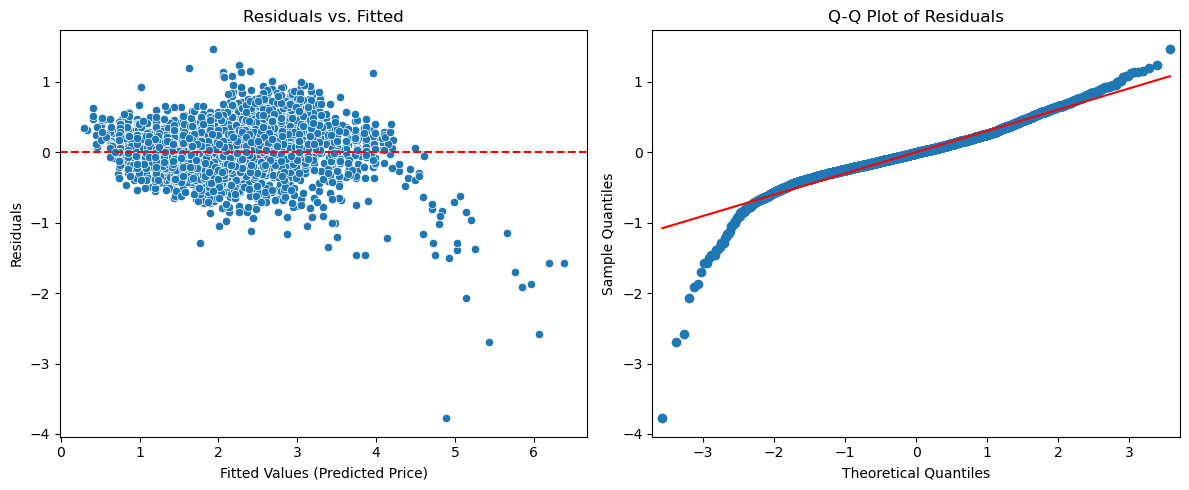

In [151]:
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(12, 5))

# 1. Residuals vs. Fitted Plot
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals, ax=ax1)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_title('Residuals vs. Fitted')
ax1.set_xlabel('Fitted Values (Predicted Price)')
ax1.set_ylabel('Residuals')

# 2. Q-Q Plot
ax2 = plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=ax2)
ax2.set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

Nel grafico dei residui notiamo che la nuvola è abbastanza concentrata verso il centro fino ad un certo punto, sulla destra i punti tendono a "cadere" verso il basso. La distribuzione non è totalmente casuale, il modello sovrastima il prezzo delle auto di fascia alta, nonostrante l'applicazione della trasformazione logaritmica sul Price. Probabile underfitting.

Nel Q-Q plot i punti tendono a seguire la linea retta ma nella cosa di sinistra si discostano, forse ci sono auto vendute prezzi diversi da quelli previsti che il modello non riesce a capire.

Adesso ricreiamo il modello applicando una standardizzazione alle variabili:

In [152]:
from sklearn.preprocessing import StandardScaler

y_inference = df['Price']

vars_da_usare = ['Age', 'Engine', 'Power'] 
X_inference = df[vars_da_usare].copy()

scaler = StandardScaler()

X_scaled_array = scaler.fit_transform(X_inference)
X_inference_scaled = pd.DataFrame(X_scaled_array, columns=X_inference.columns, index=X_inference.index)

X_inference_final = sm.add_constant(X_inference_scaled)

# 4. Fit del modello OLS
model = sm.OLS(y_inference, X_inference_final).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     9326.
Date:                Mon, 05 Jan 2026   Prob (F-statistic):               0.00
Time:                        18:59:55   Log-Likelihood:                -1257.9
No. Observations:                5710   AIC:                             2524.
Df Residuals:                    5706   BIC:                             2550.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0505      0.004    513.549      0.0

R-squared non ci indica un cambiamento ma sembra essere sparito il problema di multicollinearità grave da come ci indica il **Condition Number (3.82)**.

Adesso andiamo ad aggiungere altre variabili che, come abbiamo visto precedentemente, influiscono sul prezzo. Queste che andremo ad aggiungere hanno però bisogno di essere traformate, vediamo:
- Fuel_Type: dobbiamo utilizzare la tecnica dell'one-hot-encoding, per far si che il modello possa utilizzare al meglio questa variabile per la predizione, visto che anche modificando Fuel_Type in una avriabile dummy, non essendo essa una variabile ordinale, ci sarebbero problemi.
- Transmission: stessa cosa detta per Fuel_type
- Owner_Type: essendo di per se ordinale non ci sarebbero problemi a trasformala in una semplice variabile dummy, tuttavia questo discorso vale se ipotizziamo che il cambiamento di prezzo sia lineare al passaggio tra un numero di proprietario e un altro, per questo è meglio utilizzare pure qua il one hot encoding.

In [ ]:
from sklearn.preprocessing import StandardScaler

y_inference = df['Price']

vars_da_usare = ['Age', 'Engine', 'Power', 'Fuel_Type', 'Transmission', 'Owner_Type'] 
X_inference = df[vars_da_usare].copy()

X_inference = pd.get_dummies(X_inference, columns=['Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True, dtype=int)

# cols_to_scale = ['Age', 'Engine', 'Power']
# scaler = StandardScaler()
# X_inference[cols_to_scale] = scaler.fit_transform(X_inference[cols_to_scale])

X_inference_final = sm.add_constant(X_inference)

model = sm.OLS(y_inference, X_inference_final.astype(float)).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     5260.
Date:                Mon, 05 Jan 2026   Prob (F-statistic):               0.00
Time:                        18:59:55   Log-Likelihood:                -590.88
No. Observations:                5710   AIC:                             1198.
Df Residuals:                    5702   BIC:                             1251.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3646    

Analizziamo il risultato:

Abbiamo applicato un modello di Regressione ai nostri dati, abbiamo utilizzato il metodo dell'Ordinary Least Squares (OLS), analizziamo cosa abbiamo ottenuto.

**1. Interpretazione dei coefficienti**
- **Age (-0.3043)**: Rispetto a prima Age ha un impatto ancora più rilevante, ma ricordiamo che l'auto non perde valore in modo lineare all'aumento dell'età, l'auto perde il **30,43%** del valore ad ogni anno che passa.
- **Engine (0.1136)**: Anche Engine ha aumentato il suo peso, un aumento della dimensione del motore di un unità favorisce un incremento del prezzo di **11,36%**.
- **Power (0.3678)**: Power si rivela essere il predittore più forte in termini positivi, fa aumentare il prezzo del **36,78%**.
- **Fuel_Type_Petrol (-0.2150)**: indica che rispetto ad auto a Diesel, un auto a benzina costa circa il **21,50%** in meno.
- **Transmission_Manual (-0.2947)**: indica che rispetto alle auto Automatiche, quelle manuali costano il **30%** in meno.
-**Owner_Type (Second/Third)**: qui notiamo una svalutazione progressima, essere il secondo proprietario riduce il prezzo del **3,9%** mentre dal terzo in poi si riduce dell'**12,21%**.

**2. Analisi dei P-value**
- Tutte le variabili indipendenti hanno un impatto reale sul prezzo.

**Gooodness of Fit**
- **R-squared (0.866)**: questo valore si è alzato rispetto a prima, adesso riusciamo a spiegare circa l'**86%** della varianza nel dataset
- **Adj. R-squared (0.866)**: il valore è identico ad R-squared, non ci sono variabili inutili.


Vediamo adesso se l'aggiunta di uno tra Kilometers_Driven o Mileage o entrambi è ancora inutile oppure se è cambiato qualcosa

In [154]:
from sklearn.preprocessing import StandardScaler

y_inference = df['Price']

vars_da_usare = ['Age', 'Engine', 'Power', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Kilometers_Driven', 'Mileage'] 
X_inference = df[vars_da_usare].copy()

X_inference = pd.get_dummies(X_inference, columns=['Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True, dtype=int)

cols_to_scale = ['Age', 'Engine', 'Power', 'Kilometers_Driven', 'Mileage']
scaler = StandardScaler()
X_inference[cols_to_scale] = scaler.fit_transform(X_inference[cols_to_scale])

X_inference_final = sm.add_constant(X_inference)

model_2 = sm.OLS(y_inference, X_inference_final.astype(float)).fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     4361.
Date:                Mon, 05 Jan 2026   Prob (F-statistic):               0.00
Time:                        18:59:55   Log-Likelihood:                -431.35
No. Observations:                5710   AIC:                             882.7
Df Residuals:                    5700   BIC:                             949.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3965    

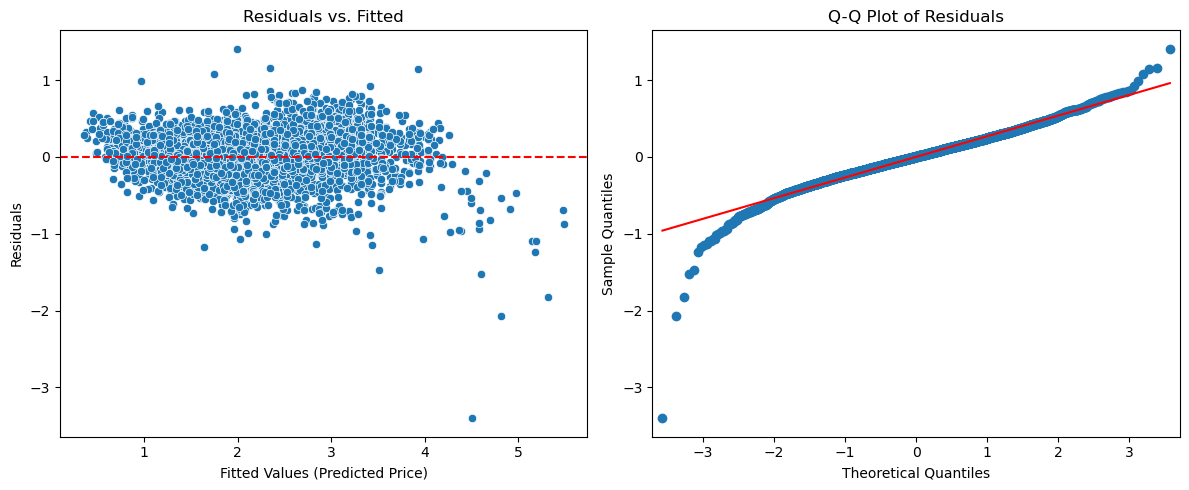

In [155]:
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(12, 5))

# 1. Residuals vs. Fitted Plot
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals, ax=ax1)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_title('Residuals vs. Fitted')
ax1.set_xlabel('Fitted Values (Predicted Price)')
ax1.set_ylabel('Residuals')

# 2. Q-Q Plot
ax2 = plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='s', ax=ax2)
ax2.set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

I grafici dei residui e Q-Q non sembrano essere cambiati.